<a href="https://colab.research.google.com/github/seanzhu815/404/blob/main/404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
"""
read the data first, the format is easy, but should work with
the dataframe instead of array.

"""

data = pd.read_csv('Portfolios_Formed_on_Size_daily.txt',delim_whitespace = 1)

"""
Mean and Vol is straight forward, you can use np.mean or the dataframe's own

attribute .mean()

"""
"""
Question 1a

"""
mean_ret = np.mean(data.iloc[:,3:],0)
std_ret = np.std(data.iloc[:,3:],0)



"""


"""







    
"""
Question3

"""
retvw = data.loc[:,'vwretd']

for i in range(4,13):
    reti = data.iloc[:,i]
    model = sm.OLS(retvw[1:],sm.add_constant(np.array(reti[:-1])))
    res1 = model.fit()
    print(res1.summary())

In [ ]:
Question 1b, how you scale the daily data to monthly and annual depends on the

business day in each interval

month_mean = 22*mean_ret
month_std = np.sqrt(22)*std_ret

annual_mean = 252*mean_ret
annual_std = np.sqrt(252)*std_ret

In [ ]:
#Question 1c




for i in range(3,13):
    model = sm.OLS(data.iloc[:,i],np.ones(len(data.index)))
    res = model.fit()
    print(res.summary())

In [ ]:
Question 1d



data_pre = data.loc[data['Year']<=1945,:]
data_post = data.loc[data['Year']>1945,:]

print(np.std(data_pre))
print(np.std(data_post))

t,pval = sp.stats.ttest_ind(data_pre.iloc[:,i],data_post.iloc[:,i],equal_var = False)


As you can see in the outcome, we hold the null hypothesis that the pre-1945 and post-1945 means are equal to each other.

And we got the answer that the p-value is 0.467>0.05, so we can not reject the null hypothesis. As a result, the pre-1945 and post-1945 means are equal to each other.

In [ ]:
"""
Question 2

"""
for i in range(len(data)):
    reti = data.loc[:,i]
    model = sm.OLS(reti.iloc[1:],sm.add_constant(np.array(reti.iloc[:-1])))
    res = model.fit()

In [ ]:
"""
Question3

"""
retvw = data.loc[:,'vwretd']

for i in range(4,13):
    reti = data.iloc[:,i]
    model = sm.OLS(retvw[1:],sm.add_constant(np.array(reti[:-1])))
    res1 = model.fit()
    print(res1.summary())

In [11]:
np.random.seed(5435576)
# seed here is used to fix a state for generating random number 
T=1000
Sims=100
wnoise = np.random.randn(T,Sims)

In [14]:
columns1 = []
for t in range(101):
    columns1.append('Y'+ str(t))
df = pd.DataFrame(columns = columns1)

In [22]:
for n in range(1000):
    index1 = [0]
    for t in range(100):
        index1.append(0.1*index1[t]+wnoise[n][t])
    df.loc[n] = index1
print(df)

      Y0        Y1        Y2        Y3        Y4        Y5        Y6  \
0    0.0 -0.710141  1.342527  1.020739  0.661182 -0.340871 -0.732553   
1    0.0 -0.929738  0.228687 -0.792427  0.072453  0.667588 -2.676199   
2    0.0 -0.570161 -1.009778 -0.299050  0.743488  0.885498 -0.184786   
3    0.0 -0.050477 -1.180335 -1.946705 -1.269634  1.144950 -2.214156   
4    0.0  0.364587 -0.288691 -0.855670  0.420142 -0.871091 -0.593641   
..   ...       ...       ...       ...       ...       ...       ...   
995  0.0  0.760360  0.403664 -0.441535  0.329277  0.894715 -0.173458   
996  0.0  1.306522 -0.747109  0.105148  1.450083 -2.383460 -2.676524   
997  0.0  0.865461 -0.565982 -0.358195  0.452459  1.264206 -0.984794   
998  0.0 -0.249324 -0.020104  2.130457 -0.747608  0.767670  1.388645   
999  0.0  1.501999  1.494001  2.299262  0.552716 -0.946621 -0.943719   

           Y7        Y8        Y9  ...       Y91       Y92       Y93  \
0   -0.945531 -0.282657 -0.874434  ... -0.042605  1.651707  0.5

In [23]:
df.iloc[:, 5]

0     -0.340871
1      0.667588
2      0.885498
3      1.144950
4     -0.871091
         ...   
995    0.894715
996   -2.383460
997    1.264206
998    0.767670
999   -0.946621
Name: Y5, Length: 1000, dtype: float64

In [24]:
df.shape[0]

1000

In [25]:
df.shape[1]
df.mean()

Y0      0.000000
Y1     -0.022838
Y2      0.094888
Y3     -0.005468
Y4      0.002637
          ...   
Y96     0.021495
Y97    -0.015979
Y98     0.009311
Y99    -0.016120
Y100   -0.001351
Length: 101, dtype: float64

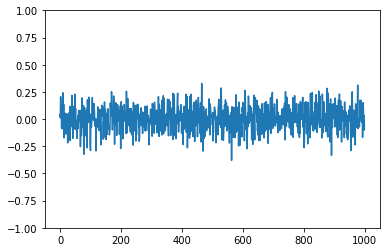

In [26]:
means_h = df.mean(axis=1)
plt.ylim(-1, 1)
plt.plot(means_h)

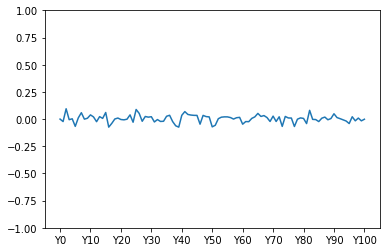

In [27]:
means_i = df.mean(axis=0)
x_major_locator = plt.MultipleLocator(10)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.ylim(-1, 1)
plt.plot(means_i)